# Сравнение алгоритмов уменьшения размерности (PCA, SVD, t-SNE, UMAP)
Сравнение основано на пункте 5.1 (Qualitative Comparison of Multiple Algorithms) статьи: https://arxiv.org/pdf/1802.03426.pdf.

## Datasets

**COIL20**: база содержит черно-белые изображения 128x128 20 предметов по 72 примера на каждый.

**MNIST**: набор черно-белых изображений 28x28, являющихся образцами рукописного написания цифр.

**Fashion MNIST**: набор изображений, взятых из статей Zalando, состоящий из обучающего набора из 60000 примеров и тестового набора из 10000 примеров. Каждый пример представляет собой черно-белое изображение 28x28, связанное с меткой из 10 классов.

**Google News Dataset**: 3000000 векторных представлений слов из новостей, векторы размерности 300.

## Сравнение





In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import gensim.downloader as api
from scipy.io import loadmat
from google.colab import files
from umap import UMAP

In [ ]:
# datasets
uploaded = files.upload()
coil20 = loadmat('COIL20.mat')
coil20_x, coil20_y = coil20['X'], coil20['Y']
mnist_x, mnist_y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
fmnist_x, fmnist_y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
wv = api.load('word2vec-google-news-300')
google_news_x = wv.vectors[:300000]
google_news_y = []

Saving COIL20.mat to COIL20 (1).mat


In [ ]:
# models
pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2)
tsne = TSNE(n_components=2)
umap = UMAP(n_components=2)

In [ ]:
datasets = [
    (coil20_x, coil20_y, 'COIL20'),
    (mnist_x, mnist_y, 'MNIST'),
    (fmnist_x, fmnist_y, 'Fashion MNIST'),
    (google_news_x, google_news_y, 'Word Vectors')

]

models = [
    (pca, 'PCA'),
    (svd, 'SVD'),
    (tsne, 't-SNE'),
    (umap, 'UMAP')
]

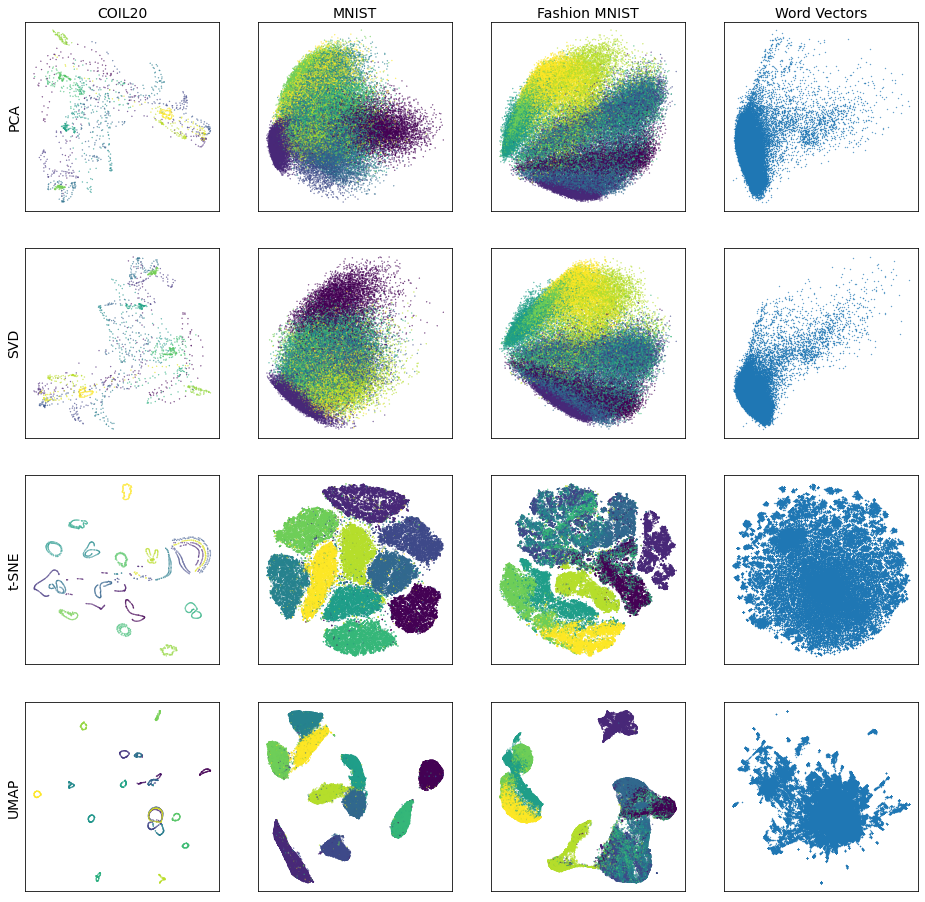

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, (model, m_name) in enumerate(models):
    for j, (X, y, d_name) in enumerate(datasets):
        if i == 0:
            axs[i, j].set_xlabel(f'{d_name}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'{m_name}', fontsize=14)
        embeddings = model.fit_transform(X)
        if d_name == 'Word Vectors':
          axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], s=0.1)
        else:
          axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=y.astype(int), s=0.1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.show()

Алгоритмы PCA и SVD работают быстро, но показывают не лучшие результаты. t-SNE сильно улучшает качество решения, но требует значительных временных затрат. UMAP является оптимальным вариантом по времени и отражению структуры данных.